In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
df = pd.read_csv("data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")

# setting date as index
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [27]:
# converting the date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# accessing the values of date via array attribute of the resulting series
    ## creating a mask via month AND day to filter out leap years
mask = (df["Date"].array.month == 2) & (df["Date"].array.day == 29)

    #reversing boolean values of the mask to filter out leap years
df = df[~mask]

# sorting by date NEWEST TO OLDEST
df.sort_values("Date", ascending = False, inplace=True)

In [52]:
# creating relevant summary table via pivot table
result_table = df.pivot_table(values="Data_Value", index="Date", aggfunc=[np.max, np.min])

# transforming tenths of degrees to FULL DEGREES on resulting columns
result_table = result_table.apply(lambda x: x/10, axis=1)
result_table

,amax,amin
,Data_Value,Data_Value
Date,,
2005-01-01,15.6,-5.6
2005-01-02,13.9,-5.6
2005-01-03,13.3,0.0
2005-01-04,3.9,-3.9
2005-01-05,3.3,-9.4
...,...,...
2015-12-26,11.7,-3.9
2015-12-27,8.3,-0.6


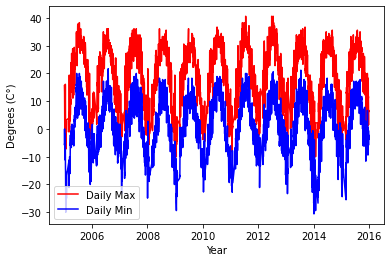

In [77]:
plt.plot(result_table.index, result_table["amax"]["Data_Value"], '-r', result_table.index, result_table["amin"]["Data_Value"], '-b')
plt.gca().xaxis.set_label_text("Year")
plt.gca().yaxis.set_label_text("Degrees (C°)")
plt.legend(["Daily Max", "Daily Min"])